https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

In [1]:
from __future__ import print_function
import torch

In [2]:
x = torch.empty(5, 3)
print(x)

tensor([[0.0000e+00, 1.5846e+29, 0.0000e+00],
        [1.5846e+29, 2.5223e-44, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4603e-19, 1.8754e+28, 1.6244e-07],
        [2.7596e-06, 1.0187e-11, 6.7996e+22]])


In [3]:
y = torch.rand(5,3)
print(y)

tensor([[0.9114, 0.5363, 0.6406],
        [0.7469, 0.9440, 0.0422],
        [0.5960, 0.4116, 0.5344],
        [0.0155, 0.9119, 0.9499],
        [0.7965, 0.3829, 0.6923]])


In [4]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [6]:
x = torch.tensor([5.5,3])
print(x)

tensor([5.5000, 3.0000])


In [7]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 1.0448,  0.8463, -1.1267],
        [ 0.7298, -0.1778,  0.3423],
        [-0.8953,  0.7574, -0.2600],
        [ 0.6295,  1.1168, -0.5149],
        [ 0.1403, -0.6572,  0.9077]])


In [8]:
print(x.size())

torch.Size([5, 3])


In [9]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 1.2594,  1.2724, -0.5288],
        [ 1.3632,  0.8114,  0.4357],
        [-0.8109,  1.0659, -0.1756],
        [ 1.2763,  1.7481, -0.3891],
        [ 0.2157, -0.6041,  1.6487]])


In [10]:
print(torch.add(x, y))

tensor([[ 1.2594,  1.2724, -0.5288],
        [ 1.3632,  0.8114,  0.4357],
        [-0.8109,  1.0659, -0.1756],
        [ 1.2763,  1.7481, -0.3891],
        [ 0.2157, -0.6041,  1.6487]])


In [11]:
# adds x to y
y.add_(x)
print(y)

tensor([[ 1.2594,  1.2724, -0.5288],
        [ 1.3632,  0.8114,  0.4357],
        [-0.8109,  1.0659, -0.1756],
        [ 1.2763,  1.7481, -0.3891],
        [ 0.2157, -0.6041,  1.6487]])


In [12]:
print(x[:, 1])

tensor([ 0.8463, -0.1778,  0.7574,  1.1168, -0.6572])


In [13]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [14]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.2692])
-0.26917195320129395


In [15]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [16]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [17]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [18]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [19]:
torch.cuda.is_available()

False

### AUTOGRAD: AUTOMATIC DIFFERENTIATION

Central to all neural networks in PyTorch is the autograd package. Let’s first briefly visit this, and we will then go to training our first neural network.

The autograd package provides automatic differentiation for all operations on Tensors. 
It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

Let us see this in more simple terms with some examples.

Tensor

torch.Tensor is the central class of the package. *If you set its attribute .requires_grad as True, it starts to track all operations on it. When you finish your computation you can call .backward() and have all the gradients computed automatically. The gradient for this tensor will be accumulated into .grad attribute.*

To stop a tensor from tracking history, you can call .detach() to detach it from the computation history, and to prevent future computation from being tracked.

To prevent tracking history (and using memory), you can also wrap the code block in with torch.no_grad():. This can be particularly helpful when evaluating a model because the model may have trainable parameters with requires_grad=True, but for which we don’t need the gradients.

There’s one more class which is very important for autograd implementation - a Function.

Tensor and Function are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each tensor has a .grad_fn attribute that references a Function that has created the Tensor (except for Tensors created by the user - their grad_fn is None).

If you want to compute the derivatives, you can call .backward() on a Tensor. If Tensor is a scalar (i.e. it holds a one element data), you don’t need to specify any arguments to backward(), however if it has more elements, you need to specify a gradient argument that is a tensor of matching shape.



In [20]:
import torch


In [21]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [22]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


### y was created as a result of an operation, so it has a grad_fn.

In [23]:
print(y.grad_fn)

In [25]:
z = y * y * 3
out = z.mean()

print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward1>)


### .requires_grad_( ... ) changes an existing Tensor’s requires_grad flag in-place. The input flag defaults to False if not given.

In [26]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


#### Let’s backprop now. Because out contains a single scalar, out.backward() is equivalent to out.backward(torch.tensor(1.)).

In [27]:
out.backward()

In [28]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


<img src="image.png">

<img src="image2.png">

In [30]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([  66.5336, 1846.6777,   -7.1134], grad_fn=<MulBackward0>)


In [31]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


In [32]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


<img src="image3.png">

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


You just have to define the forward function, and the backward function (where gradients are computed) is automatically defined for you using autograd. You can use any of the Tensor operations in the forward function.
The learnable parameters of a model are returned by net.parameters()

In [40]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight
print(params[1].size()) 
print(params[2].size()) 
print(params[3].size()) 
print(params[4].size()) 
print(params[5].size()) 
print(params[6].size()) 
print(params[7].size()) 
print(params[8].size()) 
print(params[9].size()) 

10
torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


In [41]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.2190, -0.1690, -0.1045, -0.0907, -0.1068,  0.1092,  0.0653,  0.0672,
         -0.0421, -0.0113]], grad_fn=<AddmmBackward>)


In [42]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [43]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.4912, grad_fn=<MseLossBackward>)


input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> view -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss

In [45]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [46]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [47]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

In [48]:
import torch
import torchvision
import torchvision.transforms as transforms

In [49]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

100%|█████████▉| 170491904/170498071 [09:40<00:00, 181512.47it/s]

Files already downloaded and verified


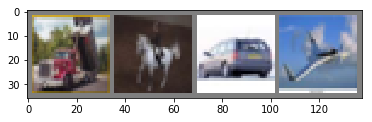

truck horse   car plane


170500096it [09:59, 181512.47it/s]                               

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [52]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


In [53]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [54]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.222
[1,  4000] loss: 1.866
[1,  6000] loss: 1.684
[1,  8000] loss: 1.626
[1, 10000] loss: 1.546
[1, 12000] loss: 1.493
[2,  2000] loss: 1.422
[2,  4000] loss: 1.387
[2,  6000] loss: 1.367
[2,  8000] loss: 1.348
[2, 10000] loss: 1.319
[2, 12000] loss: 1.292
Finished Training


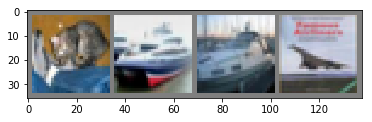

GroundTruth:    cat  ship  ship plane


In [55]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [56]:
outputs = net(images)

In [57]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [58]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [59]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 82 %
Accuracy of  bird : 27 %
Accuracy of   cat : 21 %
Accuracy of  deer : 35 %
Accuracy of   dog : 51 %
Accuracy of  frog : 68 %
Accuracy of horse : 60 %
Accuracy of  ship : 76 %
Accuracy of truck : 60 %


In [61]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode
